## Object detection using Transfer Learning of CNN architectures
* a. Load in a pre-trained CNN model trained on a large dataset 
* b. Freeze parameters (weights) in model’s lower convolutional layers
* c. Add custom classifier with several layers of trainable parameters to model 
* d. Train classifier layers on training data available for task 
* e. Fine-tune hyper parameters and unfreeze more layers as needed

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

D:\ANACONDA\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Pre processing img data

In [6]:
dataset_dir = "C:/Users/LENOVO/Desktop/SEM 7/DL/DL_Assignments/LP-IV-datasets/Object Detection(Ass6)/caltech-101-img"
dataset_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

# here batch_size is the number of images in each batch
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 9144 images belonging to 102 classes.


## Selecting first batch containing 2000 images as train and second batch containing 2000 images as test data

In [7]:
x_train, y_train =  dataset_generator[0]
x_test, y_test = dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


## a. Load in a pre-trained CNN model trained on a large dataset

In [9]:
weights_path = "C:/Users/LENOVO/Desktop/SEM 7/DL/DL_Assignments/LP-IV-datasets/Object Detection(Ass6)/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

## b.Freeze parameters (weights) in model’s lower convolutional layers

In [10]:
for layer in base_model.layers:
   layer.trainable = False

## c. Add custom classifier with several layers of trainable parameters to model

In [17]:
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

## d. Train classifier layers on training data available for task

In [18]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 25s 787ms/step - loss: 3.0286 - accuracy: 0.3675 - val_loss: 2.6505 - val_accuracy: 0.4465
Epoch 2/10
32/32 [==============================] - 25s 776ms/step - loss: 1.7074 - accuracy: 0.6135 - val_loss: 2.2616 - val_accuracy: 0.5290
Epoch 3/10
32/32 [==============================] - 24s 772ms/step - loss: 0.8860 - accuracy: 0.7900 - val_loss: 2.0663 - val_accuracy: 0.5730
Epoch 4/10
32/32 [==============================] - 24s 767ms/step - loss: 0.4115 - accuracy: 0.9080 - val_loss: 1.9896 - val_accuracy: 0.5905
Epoch 5/10
32/32 [==============================] - 24s 762ms/step - loss: 0.1703 - accuracy: 0.9705 - val_loss: 1.9882 - val_accuracy: 0.6055
Epoch 6/10
32/32 [==============================] - 24s 777ms/step - loss: 0.0641 - accuracy: 0.9950 - val_loss: 2.0713 - val_accuracy: 0.6110
Epoch 7/10
32/32 [==============================] - 26s 813ms/step - loss: 0.0221 - accuracy: 1.0000 - val_loss: 2.0011 - val_accuracy: 0.6285

## e. Fine-tune hyper parameters and unfreeze more layers as needed

In [19]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
   
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 25s 766ms/step - loss: 3.1414 - accuracy: 0.3545 - val_loss: 2.4069 - val_accuracy: 0.4780
Epoch 2/10
32/32 [==============================] - 24s 769ms/step - loss: 1.8221 - accuracy: 0.5665 - val_loss: 1.9102 - val_accuracy: 0.5550
Epoch 3/10
32/32 [==============================] - 24s 773ms/step - loss: 1.1843 - accuracy: 0.7010 - val_loss: 1.8037 - val_accuracy: 0.5850
Epoch 4/10
32/32 [==============================] - 24s 767ms/step - loss: 0.6972 - accuracy: 0.8170 - val_loss: 1.6820 - val_accuracy: 0.6060
Epoch 5/10
32/32 [==============================] - 24s 767ms/step - loss: 0.4520 - accuracy: 0.8715 - val_loss: 1.6738 - val_accuracy: 0.6355
Epoch 6/10
32/32 [==============================] - 24s 765ms/step - loss: 0.2719 - accuracy: 0.9200 - val_loss: 1.6930 - val_accuracy: 0.6225
Epoch 7/10
32/32 [==============================] - 24s 764ms/step - loss: 0.1841 - accuracy: 0.9535 - val_loss: 1.7560 - val_accuracy: 0.6210

In [20]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

63/63 [==============================] - 13s 203ms/step


In [21]:
labels = list(dataset_generator.class_indices.keys())

Preditcted:  ant
Actual:  starfish


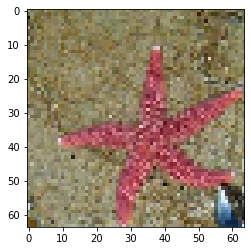

In [22]:
n = 1000
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])